In [66]:
import os
import ipywidgets as widgets
import numpy as np
import h5py

In [63]:
class FileBrowser(object):
    def __init__(self):
        self.path = os.getcwd()
        self._update_files()
        
    def _update_files(self):
        self.files = list()
        self.dirs = list()
        if(os.path.isdir(self.path)):
            for f in os.listdir(self.path):
                ff = self.path + "/" + f
                if os.path.isdir(ff):
                    self.dirs.append(f)
                else:
                    self.files.append(f)
        
    def widget(self):
        box = widgets.VBox()
        self._update(box)
        return box
    
    def _update(self, box):
        
        def on_click(b):
            if b.description == '..':
                self.path = os.path.split(self.path)[0]
            else:
                self.path = self.path + "/" + b.description
            self._update_files()
            self._update(box)
        
        buttons = []
        if self.files:
            button = widgets.Button(description='..', background_color='#d0d0ff')
            button.on_click(on_click)
            buttons.append(button)
        for f in self.dirs:
            button = widgets.Button(description=f, background_color='#d0d0ff')
            button.on_click(on_click)
            buttons.append(button)
        for f in self.files:
            button = widgets.Button(description=f)
            button.on_click(on_click)
            buttons.append(button)
        box.children = tuple([widgets.HTML("<h2>%s</h2>" % (self.path,))] + buttons)

# example usage:
#   f = FileBrowser()
#   f.widget()
#   <interact with widget, select a path>
# in a separate cell:
#   f.path # returns the selected path

# via "DrDub" https://gist.github.com/DrDub/6efba6e522302e43d055

In [90]:
f = FileBrowser()
f.widget()

A Jupyter Widget

In [91]:
f.path

'/Users/cad/Desktop/cad_ses1_behav_06_24_2018.hdf'

In [92]:
csH5 = h5py.File(f.path, 'r')
cskeys=list(csH5.keys())
csdset=csH5[cskeys[0]]
csdims=csdset.shape

hdf5 files imported this way act like a dictionary.
http://docs.h5py.org/en/latest/quick.html
https://docs.python.org/3/library/stdtypes.html#dict-views

In [76]:
from matplotlib import pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


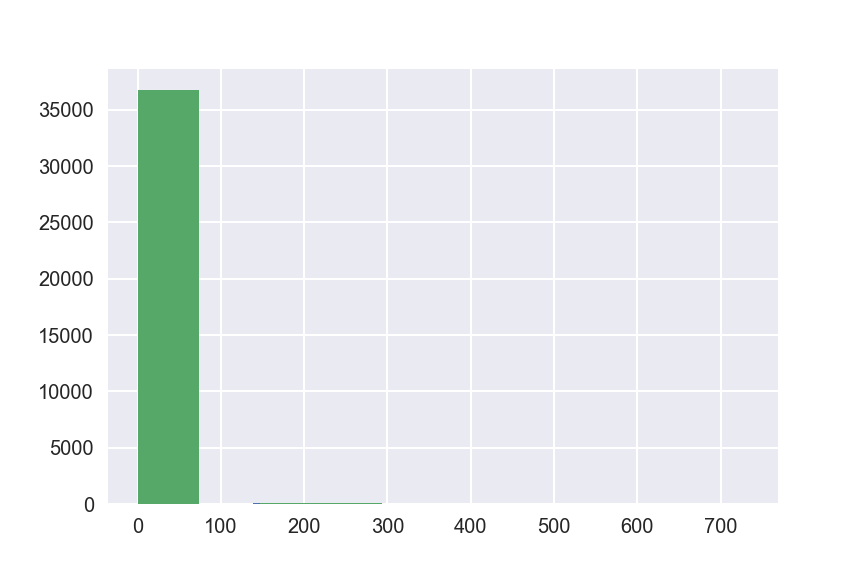

In [93]:
tp=plt.figure()
plt.hist(np.diff(csdset[:,0]))
plt.hist(np.diff(csdset[:,1]))
plt.show(tp)

<IPython.core.display.Javascript object>


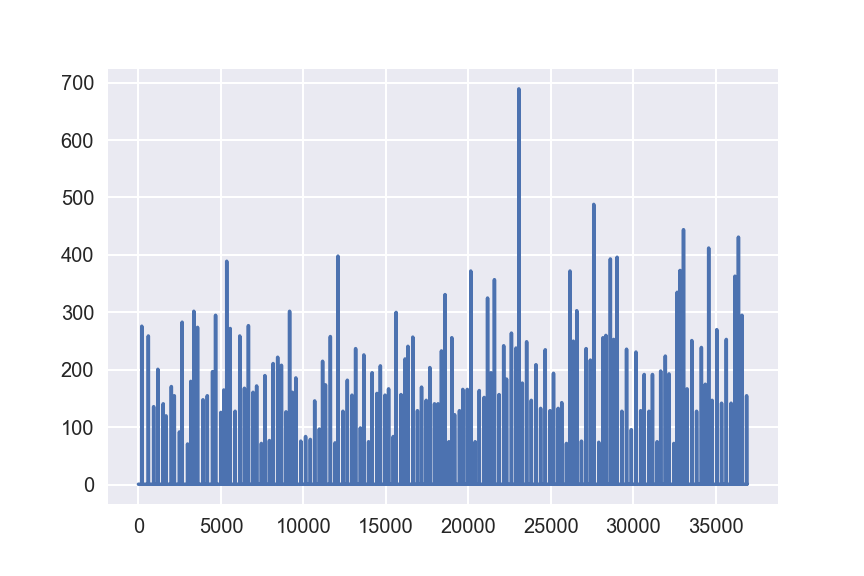

In [97]:
plt.figure()
plt.plot(np.diff(csdset[:,0]))

In [94]:
# how much jitter?

intRange=np.max(np.diff(csdset[:,0]))-np.min(np.diff(csdset[:,0]))
tstmpRange=np.max(np.diff(csdset[:,1]))-np.min(np.diff(csdset[:,1]))


interrupt range=%
